# Project 1: Exploratory Data Analysis (EDA)

#### Backstory
WomenTechWomenYes (WTWY) has an annual gala at the beginning of the summer each year. The organization wants to fill its event space with individuals passionate about increasing the participation of women in technology, and to concurrently build awareness and reach.

To this end WTWY will place street teams at entrances to subway stations. The street teams collect email addresses and those who sign up are sent free tickets to our gala.

#### Goal
In order to assist WTWY with attendance for the gala and engagement with the organization's mission, we will use MTA subway data to help us optimize the placement of the street teams so that the most signatures are gathered, ideally from those who will attend the gala and contribute to WTWY's cause.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
import datetime

#### Challenge 1.1
* Open up a new Jupyter notebook
* Download a few MTA turnstile data files
* Load the files into a pandas DataFrame (hint: pd.read_csv() to load files and pd.concat() to combine DataFrames)

Read the data into six separate dataframes and concatenate the data into one dataframe.

In [35]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [200606, 200530, 200411, 200321, 200208, 200118]
turnstiles_df = get_data(week_nums)

In [36]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [37]:
# Check to see if column names have any leading or trailing whitespace or unwanted characters
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [38]:
# Remove whitespace from the EXITS column
turnstiles_df.columns = turnstiles_df.columns.str.strip()

In [39]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [40]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [41]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205616,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,04:00:00,REGULAR,5554,420
205617,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,08:00:00,REGULAR,5554,420
205618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,12:00:00,REGULAR,5554,420
205619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,16:00:00,REGULAR,5554,420
205620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,20:00:00,REGULAR,5554,420


#### Challenge 1.2
* Let's turn this into a time series.
* Our pandas dataframe has columns called Date and Time (what datatype did pandas assign to these columns on import?), however in python and pandas we can convert date and time information to datetime objects, which allow us to do time-based operations
* Using either pd.to_datetime in pandas or the python datetime library, combine the Date and Time columns into a single new column of the datetime datatype

The DATE and TIME columns are object datatypes, which in Pandas is a string. We want to convert them to a single datetime object.

In [42]:
from datetime import datetime as dt

In [43]:
# print('DATE datatype: {}, TIME datatype: "{}"'.format(df['DATE'].dtypes, df['TIME'].dtypes))

In [44]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

After conversion, the datatype for the DATE_TIME column is a datetime.

In [45]:
turnstiles_df['DATE_TIME'].dtypes

dtype('<M8[ns]')

In [46]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


Before moving on to Challenge 3, we want to check for duplicate entries.

In [47]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
187403,H001,R175,00-00-02,8 AV,2020-02-01 00:00:00,2
233112,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
828378,R141,R031,00-03-01,34 ST-PENN STA,2020-03-18 16:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [48]:
# On 2/1, we have two entries for the same time.
mask = ((turnstiles_df["C/A"] == "H001") & 
(turnstiles_df["UNIT"] == "R175") & 
(turnstiles_df["SCP"] == "00-00-02") & 
(turnstiles_df["STATION"] == "8 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 2, 1).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
30865,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,00:00:00,REGULAR,16366480,9248547,2020-02-01 00:00:00
30866,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,00:00:00,RECOVR AUD,2625,6503,2020-02-01 00:00:00
30867,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,04:00:00,REGULAR,16366619,9248579,2020-02-01 04:00:00
30868,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,08:00:00,REGULAR,16366671,9248643,2020-02-01 08:00:00
30869,H001,R175,00-00-02,8 AV,ACEL,BMT,02/01/2020,12:00:00,REGULAR,16366813,9248865,2020-02-01 12:00:00


The duplicate value can be seen in the DESC column as a "RECOVR AUD." The column itself refers to the regularly scheduled audit events which take place every 4 hours. However, occasionally a missed audit is recovered and is logged under a different identifier. While not all RECOVR AUD values are duplicates, the two we identified are.

In [49]:
# We also have duplicate entries for 5/27.
mask = ((turnstiles_df["C/A"] == "J009") & 
(turnstiles_df["UNIT"] == "R378") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "MYRTLE AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 5, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
40877,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,01:00:00,REGULAR,3047244,2109618,2020-05-27 01:00:00
40878,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,REGULAR,3047247,2109623,2020-05-27 05:00:00
40879,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,RECOVR AUD,3047246,2109623,2020-05-27 05:00:00
40880,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,09:00:00,REGULAR,3047363,2109697,2020-05-27 09:00:00
40881,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,13:00:00,REGULAR,3047424,2109765,2020-05-27 13:00:00


In [50]:
turnstiles_df.DESC.value_counts()

REGULAR       1237883
RECOVR AUD       4690
Name: DESC, dtype: int64

We'll now remove the duplicates entries.

In [51]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [52]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-01-11 03:00:00,1
828387,R141,R031,00-03-01,34 ST-PENN STA,2020-03-20 04:00:00,1
828385,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 20:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [53]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Challenge 1.3
* Each row is a turnstile, identified by a combination of the C/A, UNIT, SCP, and STATION columns, with information on entries and exits at that turnstile every n hours. (What is n?) We want total daily entries.
* Group the data so that it represents daily entries for each turnstile (hint: pd.groupby or DataFrame.groupby)

In [54]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [55]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/11/2020,7340476
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249


In [56]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .apply(lambda grp: grp.shift(1)))

In [57]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/11/2020,7340476,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0


In [58]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
206588,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/01/2020,5554,05/31/2020,5554.0
206589,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/02/2020,5554,06/01/2020,5554.0
206590,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/03/2020,5554,06/02/2020,5554.0
206591,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/04/2020,5554,06/03/2020,5554.0
206592,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/05/2020,5554,06/04/2020,5554.0


In [59]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

We'll now filter to try to find more areas of the data that do not make since. Here we're trying to find entries that are less than their previous value.

In [60]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
476,A002,R051,02-06-00,59 ST,03/14/2020,35096,02/07/2020,76716.0
686,A006,R079,00-00-04,5 AV/59 ST,05/23/2020,1258,04/10/2020,7896758.0
714,A006,R079,00-03-00,5 AV/59 ST,03/14/2020,2330,02/07/2020,9410826.0
1060,A007,R079,01-06-03,5 AV/59 ST,04/07/2020,4,04/06/2020,7832194.0
1625,A011,R080,01-03-00,57 ST-7 AV,01/12/2020,885732015,01/11/2020,885732453.0


In [61]:
# Let's see how many stations have this problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST               1
A006   R079  00-00-04  5 AV/59 ST          1
             00-03-00  5 AV/59 ST          1
A007   R079  01-06-03  5 AV/59 ST          1
A011   R080  01-03-00  57 ST-7 AV         41
                                          ..
R629   R065  00-03-00  ROCKAWAY AV         1
R639   R109  00-05-02  CHURCH AV           1
R729   R292  00-00-01  BAYCHESTER AV       1
R730   R431  00-00-04  EASTCHSTER/DYRE    41
TRAM1  R468  00-00-01  RIT-MANHATTAN       1
Length: 288, dtype: int64

In [62]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1258 7896758.0
2330 9410826.0
4 7832194.0
1687 1562921047.0
848 1180101.0
4875 7244466.0
5305 1196338.0
43 6777224.0
17224 1083160.0
294 6612092.0
107 8235039.0
2033924 364303.0
36 5666890.0
25 8800439.0
475952125 7379372.0
2920 3114791.0
618862 2624193.0
17126450 19676957.0
15066625 17126282.0
25528773 15065804.0
12316490 25525671.0
72 1015375.0
1616 2632946.0
2800 3567412.0
13865 6119754.0
49 8294808.0
15 2090862.0
18 168627933.0
1175 4733498.0
83886121 22940.0
16965 11957933.0
2937635 79502.0
321184286 5589416.0
307624182 321184285.0
673 4895014.0
32 1317615.0
4785471 11470775.0
47325 4829073.0
6031 2011827.0
270537780 536177.0
2323 13973128.0
1062 2302008.0
3139 2405464.0
395233 2064683.0
111220 6561938.0
2010 22737699.0
18023 3853709.0
524538 118139950.0
14336 69155900.0
4410 9499451.0
8988 8436536.0
2863 1936022.0
25316 1476413.0
1245971397 2299884.0
1779 3529732.0
60 7675482.0
8369771 1820899.0
578409 2805680.0
2162 9037638.0
3779 1501563.0
1627393907 6366854.0
203 1408008.0
12 

In [63]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0


# Warren's edits continue here

In [ ]:
turnstiles_daily[turnstiles_daily['DATE'].month == 3]

In [64]:
turnstiles_daily.groupby(['STATION']).DAILY_ENTRIES.sum() \
    .reset_index().sort_values(by=['DAILY_ENTRIES'],ascending=False).head()

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,10684004.0
46,23 ST,8007608.0
233,GRD CNTRL-42 ST,7716165.0
68,42 ST-PORT AUTH,7146268.0
59,34 ST-HERALD SQ,6745862.0


In [65]:
len(turnstiles_daily['STATION'].unique())

379

In [66]:
turnstiles_daily.to_csv("turnstile daily entries.csv")

# Process Station ID Data

In [67]:
# source: https://qri.cloud/nyc-transit-data/remote_complex_lookup
# more info on data found here: https://medium.com/qri-io/taming-the-mtas-unruly-turnstile-data-c945f5f96ba0

station_ids = pd.read_csv("station_ids.csv")

station_ids.columns = ['UNIT','C/A','ID','STATION','LINENAME','DIVISION']

# here, ID refers to the complex of a metro station - some complexes might include multiple stops
station_ids=station_ids[['UNIT','ID']]
station_ids = station_ids.drop_duplicates()
station_ids.sample(n=15)

,UNIT,ID
135,R061,343.0
520,R297,627.0
220,R117,293.0
492,R278,31.0
728,R459,NaN
723,R454,30.0
536,R306,294.0
689,R428,361.0
439,R243,387.0
181,R095,1.0


# Process Station Location Data

Source: http://web.mta.info/developers/data/nyct/subway/Stations.csv

In [68]:
location_raw = pd.read_csv("Stations.csv")

columns = ['Complex ID','Stop Name','Borough','GTFS Latitude','GTFS Longitude']
col_names = ['ID','STATION_L','BOROUGH','LAT','LON']
naming = {columns[i]:col_names[i] for i in range(len(columns))}

location_raw = location_raw.rename(columns=naming) 

# Note that there are multiple coordinates for a given stop ID
id_freq = location_raw.groupby(['ID'])['LAT'].count().reset_index().sort_values('LAT',ascending=False)
print("id_freq has",len(id_freq[id_freq['LAT']>1]),"IDs with multiple latitudes")
id_freq[id_freq['LAT']>1].head()

id_freq has 35 IDs with multiple latitudes


,ID,LAT
423,611,5
440,628,4
436,624,4
435,623,4
413,601,3


#### Look into ID 611 (Times Sq), note that coordinates vary slightly based on location of line for each station

In [69]:
location_raw[location_raw['ID']==611]

,Station ID,ID,GTFS Stop ID,Division,Line,STATION_L,BOROUGH,Daytime Routes,Structure,LAT,LON,North Direction Label,South Direction Label,ADA,ADA Notes
10,11,611,R16,BMT,Broadway - Brighton,Times Sq-42 St,M,N Q R W,Subway,40.754672,-73.986754,Uptown & Queens,Downtown & Brooklyn,1,NaN
162,163,611,A27,IND,8th Av - Fulton St,42 St-Port Authority Bus Terminal,M,A C E,Subway,40.757308,-73.989735,Uptown - Queens,Downtown & Brooklyn,1,NaN
317,317,611,127,IRT,Broadway - 7Av,Times Sq-42 St,M,1 2 3,Subway,40.755290,-73.987495,Uptown & The Bronx,Downtown & Brooklyn,1,NaN
468,467,611,725,IRT,Flushing,Times Sq-42 St,M,7,Subway,40.755477,-73.987691,Queens,34 St - Hudson Yards,1,NaN
469,468,611,902,IRT,Lexington - Shuttle,Times Sq-42 St,M,S,Subway,40.755983,-73.986229,NaN,Grand Central,0,NaN


#### Resolve to average latitude and longitude of IDs to capture general location of IDs

In [70]:
location = location_raw.groupby(['ID','BOROUGH'])[['LAT','LON']].mean()
location

,,LAT,LON
ID,BOROUGH,,
1,Q,40.775036,-73.912034
2,Q,40.770258,-73.917843
3,Q,40.766779,-73.921479
4,Q,40.761820,-73.925508
5,Q,40.756804,-73.929575
...,...,...,...
628,M,40.710089,-74.007838
629,Bk,40.713428,-73.950847
630,Bk,40.699622,-73.911986


# Process Income Data

#### NY household income data from
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2018-zip-code-data-soi
#### import (takes a while)

In [71]:
zip_income_raw = pd.read_excel("18zp33ny.xlsx",skiprows =3,usecols="A:C",nrows=10745)
zip_income_raw.columns = ['ZIP','INCGROUP','NRETURNS']
zip_income_raw.head()

,ZIP,INCGROUP,NRETURNS
0,NaN,NaN,NaN
1,NaN,NaN,-1.0
2,0.0,Total,9632130.0
3,0.0,"$1 under $25,000",3161790.0
4,0.0,"$25,000 under $50,000",2223030.0


In [72]:
zip_income = zip_income_raw.copy().dropna(subset=['ZIP'])

#flag total groups
zip_income.loc[zip_income['INCGROUP'].isna(),'INCGROUP'] = "Total" 
zip_income['FLAG_TOTAL'] = 0
zip_income.loc[zip_income['INCGROUP']=='Total','FLAG_TOTAL'] = 1

#flag rich groups
zip_income['FLAG_RICH'] = 0
zip_income.loc[zip_income['INCGROUP']=='$200,000 or more','FLAG_RICH'] = 1 

# keep only highest tier and total counts
zip_income = zip_income[(zip_income['FLAG_RICH']==1) | (zip_income['FLAG_TOTAL']==1)]
zip_income = zip_income.groupby(['ZIP','INCGROUP']).NRETURNS.sum()
zip_income

ZIP      INCGROUP        
0.0      $200,000 or more     634070.0
         Total               9632130.0
10001.0  $200,000 or more       3170.0
         Total                 16150.0
10002.0  $200,000 or more       2210.0
                               ...    
14482.0  Total                  4080.0
14485.0  $200,000 or more         50.0
         Total                  2010.0
14486.0  $200,000 or more          0.0
         Total                   160.0
Name: NRETURNS, Length: 2686, dtype: float64

In [73]:
rich_zips = zip_income.unstack('INCGROUP').reset_index()
rich_zips['RICH_INDEX'] = rich_zips['$200,000 or more']/rich_zips['Total']

rich_zips.head()

INCGROUP,ZIP,"$200,000 or more",Total,RICH_INDEX
0,0.0,634070.0,9632130.0,0.065829
1,10001.0,3170.0,16150.0,0.196285
2,10002.0,2210.0,42400.0,0.052123
3,10003.0,7240.0,29270.0,0.247352
4,10004.0,920.0,2470.0,0.372470


# Merge zip code to location data

In [74]:
import math

zipcodes = pd.read_csv("us-zip-code-latitude-and-longitude.csv",delimiter=";")

# keep only NYC zipcodes
zipcodes = zipcodes[(zipcodes['State']=="NY")&(zipcodes['City']=="New York")]

columns = ['Zip','Latitude','Longitude']
col_names = ['ZIP','LAT','LON']
naming = {columns[i]:col_names[i] for i in range(len(columns))}

zipcodes = zipcodes.rename(columns=naming)
zipcodes

,ZIP,City,State,LAT,LON,Timezone,Daylight savings time flag,geopoint
229,10117,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"
627,10242,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"
774,10125,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"
1128,10034,New York,NY,40.867653,-73.920000,-5,1,"40.867653,-73.92"
1129,10038,New York,NY,40.709677,-74.003650,-5,1,"40.709677,-74.00365"
...,...,...,...,...,...,...,...,...
41841,10122,New York,NY,40.751757,-73.992171,-5,1,"40.751757,-73.992171"
42015,10114,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"
42024,10131,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"
42202,10011,New York,NY,40.741012,-74.000120,-5,1,"40.741012,-74.00012"


#### Find the shortest distance between station coordinates and zipcode coordinates to determine zipcode of a station

In [75]:
zips = []
for idx, row in location.iterrows():
    lat = row['LAT']
    lon = row ['LON']
    
    min_dist = float('inf')
    min_zip = None
    
    for idx_2, row_2 in zipcodes.iterrows():
        lat_2 = row_2['LAT']
        lon_2= row_2['LON']
        
        norm = (lat-lat_2)**2 + (lon-lon_2)**2
        norm = math.sqrt(norm)
        if norm<min_dist:
            min_dist = norm
            min_zip = row_2['ZIP']
    
    zips.append([min_zip,min_dist])

zips[:5]

[[10035, 0.03483067637873825],
 [10162, 0.03110072901074764],
 [10162, 0.027569646823997627],
 [10044, 0.02366464789512149],
 [10044, 0.020317502922354562]]

#### Merging data to location data frame

In [76]:
location['ZIP'] = pd.DataFrame([x[0] for x in zips]).set_index(location.index)
location

,,LAT,LON,ZIP
ID,BOROUGH,,,
1,Q,40.775036,-73.912034,10035
2,Q,40.770258,-73.917843,10162
3,Q,40.766779,-73.921479,10162
4,Q,40.761820,-73.925508,10044
5,Q,40.756804,-73.929575,10044
...,...,...,...,...
628,M,40.710089,-74.007838,10045
629,Bk,40.713428,-73.950847,10009
630,Bk,40.699622,-73.911986,10009


# Merge income information to location data

In [77]:
location_inc = location.reset_index().merge(rich_zips,on="ZIP",how='left',indicator=True).drop(columns=['$200,000 or more','Total'])
# print merge results
print(len(location_inc[location_inc['_merge']=='both']),"obs merged out of",len(location_inc))

location_inc = location_inc.drop(columns='_merge')

# resolve to fill missing income data with median income values?

location_inc

196 obs merged out of 445


,ID,BOROUGH,LAT,LON,ZIP,RICH_INDEX
0,1,Q,40.775036,-73.912034,10035,0.027617
1,2,Q,40.770258,-73.917843,10162,0.452055
2,3,Q,40.766779,-73.921479,10162,0.452055
3,4,Q,40.761820,-73.925508,10044,0.126915
4,5,Q,40.756804,-73.929575,10044,0.126915
...,...,...,...,...,...,...
440,628,M,40.710089,-74.007838,10045,NaN
441,629,Bk,40.713428,-73.950847,10009,0.080120
442,630,Bk,40.699622,-73.911986,10009,0.080120
443,635,M,40.702577,-74.013329,10041,NaN


# Merge ID with Stations

In [78]:
merge_id = turnstiles_daily.merge(station_ids,on=['UNIT'],how='left',indicator=True)

# print merge results
print(len(merge_id[merge_id['_merge']=='both']),"obs merged out of",len(merge_id))

# drop indicator
merge_id = merge_id.drop(columns='_merge')

# determine percentage of ridership captured by ID'd stations
id_ridership = merge_id[~merge_id['ID'].isna()].DAILY_ENTRIES.sum()
total_ridership = merge_id.DAILY_ENTRIES.sum()
print("The ridership captured by stations with IDs is", id_ridership/total_ridership)

merge_id

202826 obs merged out of 202826
The ridership captured by stations with IDs is 0.9464268855350062


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,ID
0,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0,613.0
1,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0,613.0
2,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0,613.0
3,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0,613.0
4,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0,613.0
...,...,...,...,...,...,...,...,...,...,...
202821,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/01/2020,5554,05/31/2020,5554.0,0.0,NaN
202822,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/02/2020,5554,06/01/2020,5554.0,0.0,NaN
202823,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/03/2020,5554,06/02/2020,5554.0,0.0,NaN
202824,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/04/2020,5554,06/03/2020,5554.0,0.0,NaN


In [79]:
# list of stations with no ID - can confirm with source document that no ID exists for these stations

pd.Series(merge_id[merge_id['ID'].isna()]['STATION'].unique()).sort_values()

10        14TH STREET
9          9TH STREET
8      CHRISTOPHER ST
7          CITY / BUS
5      EXCHANGE PLACE
4        GROVE STREET
2            HARRISON
3      JOURNAL SQUARE
13         LACKAWANNA
15       NEWARK BM BW
16           NEWARK C
17       NEWARK HM HE
1     NEWARK HW BMEBE
0       ORCHARD BEACH
19       PATH NEW WTC
18         PATH WTC 2
6     PAVONIA/NEWPORT
20      RIT-MANHATTAN
21      RIT-ROOSEVELT
12          THIRTY ST
14    THIRTY THIRD ST
11    TWENTY THIRD ST
dtype: object

# Merge location and income on ID

In [81]:
merge_loc = merge_id.merge(location_inc,on=['ID'],how='left',indicator=True)

# print merge results
print(len(merge_loc[merge_loc['_merge']=='both']),"obs merged out of",len(merge_loc))

# drop indicator
merge_loc = merge_loc.drop(columns='_merge')

merge_loc.sample(n=15)

188768 obs merged out of 202826


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,ID,BOROUGH,LAT,LON,ZIP,RICH_INDEX
142721,R170,R191,00-00-00,103 ST,04/08/2020,2740181,04/07/2020,2740025.0,156.0,309.0,M,40.799446,-73.968379,10025.0,0.184865
18736,B026,R230,00-05-00,NECK RD,05/26/2020,535,05/25/2020,535.0,0.0,53.0,Bk,40.595246,-73.955161,11286.0,NaN
183785,R518,R261,00-03-01,40 ST LOWERY ST,05/29/2020,14991316,05/28/2020,14991187.0,129.0,459.0,Q,40.743781,-73.924016,10044.0,0.126915
156897,R238,R046,00-03-04,GRD CNTRL-42 ST,02/05/2020,37707453,02/04/2020,37707183.0,270.0,610.0,M,40.751992,-73.977359,10168.0,NaN
123291,PTH19,R549,02-02-01,NEWARK C,05/29/2020,71655,05/28/2020,71655.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
66799,N127,R442,00-00-02,SHEPHERD AV,03/15/2020,906053,03/14/2020,905720.0,333.0,187.0,Bk,40.674130,-73.880750,11517.0,NaN
154958,R231A,R176,01-06-00,33 ST,05/31/2020,807116,05/30/2020,807105.0,11.0,403.0,M,40.746081,-73.982076,10016.0,0.214563
84206,N330C,R202,01-04-00,63 DR-REGO PARK,04/09/2020,1062,04/08/2020,1062.0,0.0,263.0,Q,40.729846,-73.861604,10044.0,0.126915
128616,R108A,R305,05-00-00,WTC-CORTLANDT,03/16/2020,147,03/15/2020,139.0,8.0,328.0,M,40.711835,-74.012188,10048.0,NaN
9314,A049,R088,02-00-02,CORTLANDT ST,04/10/2020,961653,04/09/2020,961644.0,9.0,624.0,M,40.712603,-74.009552,10279.0,NaN


In [440]:
merge_loc.to_csv("turnstile daily entries w income.csv")

# Appendix

## Investigate distribution of rich

In [403]:
print(rich_zips['RICH_INDEX'].median())

rich_zips['RICH_INDEX'].describe()

0.0221606648199446


count    1343.000000
mean        0.053521
std         0.081209
min         0.000000
25%         0.000000
50%         0.022161
75%         0.067102
max         0.575630
Name: RICH_INDEX, dtype: float64

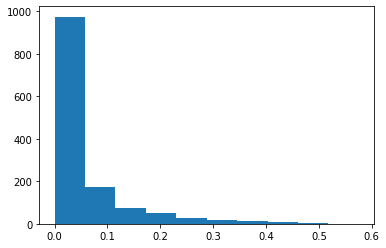

In [391]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(rich_zips['RICH_INDEX'].values);

In [387]:
# identify zip codes with the highest portion of rich households
%matplotlib inline
import matplotlib.pyplot as plt

rich_zips.sort_values(by='RICH_INDEX',ascending=False).head(20)


INCGROUP,ZIP,"$200,000 or more",Total,RICH_INDEX
45,10282.0,1370.0,2380.0,0.575630
7,10007.0,1790.0,3760.0,0.476064
93,10514.0,2560.0,5440.0,0.470588
137,10597.0,220.0,480.0,0.458333
43,10162.0,330.0,730.0,0.452055
40,10069.0,1430.0,3170.0,0.451104
85,10504.0,1740.0,4170.0,0.417266
109,10538.0,3310.0,8120.0,0.407635
215,11030.0,3560.0,8750.0,0.406857
333,11568.0,680.0,1680.0,0.404762
